<a href="https://colab.research.google.com/github/RabeenaRasulla/eCommerce-Transactions-Dataset/blob/main/Customer_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

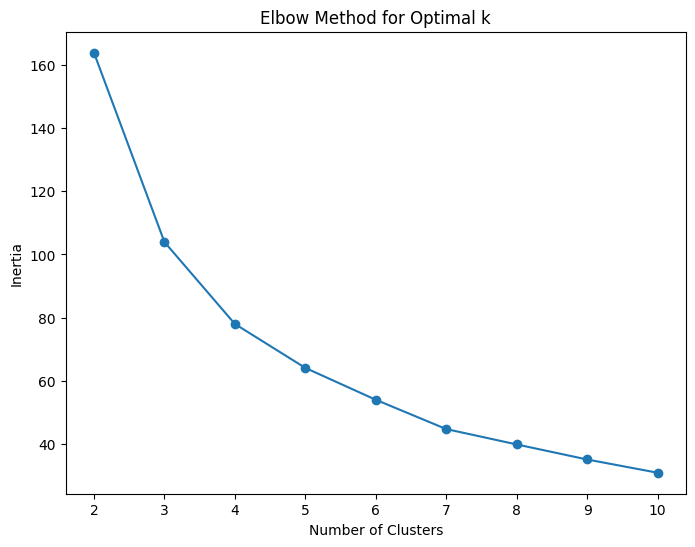

Davies-Bouldin Index: 0.8595340221510472
         TransactionID   TotalValue
Cluster                            
0             8.257143  6172.260857
1             2.225000  1200.152000
2             5.964286  4272.589286
3             4.235294  2745.519853
Number of Clusters: 4
Davies-Bouldin Index: 0.8595340221510472


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the datasets (assuming they are in the same directory)
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge DataFrames
df = transactions.merge(customers, on='CustomerID')

# Calculate customer-level features
customer_agg = df.groupby('CustomerID').agg({
    'TransactionID': 'count',  # Number of transactions
    'TotalValue': 'sum'        # Total spending
}).reset_index()

# Merge aggregated data with customer profile
df_merged = pd.merge(customers, customer_agg, on='CustomerID')

# Select features for clustering
features = ['TransactionID', 'TotalValue']

# Standardize the features
scaler = StandardScaler()
df_scaled = df_merged[features].copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

# Determine optimal number of clusters (using Elbow method)
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose the optimal number of clusters based on the elbow plot
optimal_k = 4  # Example: Choose the 'elbow' point from the plot

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_merged['Cluster'] = kmeans.fit_predict(df_scaled)

# Calculate DB Index
db_index = davies_bouldin_score(df_scaled, df_merged['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Analyze cluster characteristics
print(df_merged.groupby('Cluster')[features].mean())

print(f"Number of Clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {db_index}")